In [2]:
import numpy as np
import os
import glob
import allantools
import matplotlib.pyplot as plt
from tqdm import tqdm

import counts_statistics_qpe as cs
import phase_estimation_functions as qpe
import verification_functions as verif
from densitymatrix import DM

# import numdifftools as nd
# import numpy.linalg as lg
# import scipy.optimize as sp

GHZ

In [14]:
####################### VERIFICATION ANALYSIS #################
data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\with_Certification"
filenames = ["COMPLETE_QPE_FIRST_RUN", "COMPLETE_QPE_SECOND_RUN", "COMPLETE_QPE_THIRD_RUN", "COMPLETE_QPE_FOURTH_RUN", "COMPLETE_QPE_FIFTH_RUN", "COMPLETE_QPE_SIXTH_RUN"]
#filenames = ["COMPLETE_QPE_BELL_FIRST_RUN_20250129175719","COMPLETE_QPE_BELL_SECOND_RUN_20250129230913","COMPLETE_QPE_BELL_THIRD_RUN_20250203010747"]
# filenames = [i for i in glob.glob("QPE*")]
os.chdir(data_dir)
n_qubits = 4
input_state = "GHZ" #"Bell" or "GHZ" # This will specify in which folder we want to save the figures

In [18]:
"""
Reading and analysing the stats files
"""
# n_rounds=30
# stats = {}

# for file in filenames:
#     stats[file] = []
#     for i in range(n_rounds):
#         stats_dir = f"{data_dir}\{file}\statistics\\v_round={i}"
#         stats[file].append(cs.Read_Operator_Statistics(stats_dir))

'\nReading and analysing the stats files\n'

In [16]:
"""
Reading and analysing the stats files
"""
n_rounds=30
qtys = ["n_samples", "n_samples_error", "p_pass", "p_pass_error"]
samples_evolution = np.arange(1, 1e4, 1)
p_fail_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))
p_fail_error_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))

for index, file in enumerate(filenames):
    for i in tqdm(range(n_rounds)):
        stats_dir = f"{data_dir}\{file}\stats_originalverif\\v_round={i}"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
        p_fail_evolution[index][i] = 1 - np.array(p_pass_list, dtype=float)
        p_fail_error_evolution[index][i] = np.array(p_pass_error_list, dtype=float)

100%|██████████| 30/30 [00:01<00:00, 24.48it/s]


In [17]:
##### Get data from the verification #####
final_p_fail_max = []
final_p_fail_mean = []
final_p_fail_mean_error = []

significance_data = []
lamb = 1/2
delta = 0.01
final_epsilons = []

for index, file in enumerate(filenames):
    final_p_fail_max.append(np.round(np.max(p_fail_evolution[index], axis = 0)[-1], 4))
    final_p_fail_mean.append(np.round(np.average(p_fail_evolution[index], axis = 0)[-1], 4))
    final_p_fail_mean_error.append(np.round(np.sqrt(np.sum(p_fail_error_evolution[index]**2, axis = 0)[-1])/30, 4))

    epsilon = np.round(verif.get_epsilon(lamb, delta, 1e4, final_p_fail_max[index], 0.06).x[0], 4)
    final_epsilons.append(epsilon)

final_p_fail_mean = np.array(final_p_fail_mean, dtype = float)
final_p_fail_error_mean = np.array(final_p_fail_mean_error, dtype = float)
print(f"Max value of final failure rate (over all 30 rounds), for each combination of angles: \n{final_p_fail_max}")
print(f"Mean value of final failure rate (over all 30 rounds), for each combination of angles: \n{final_p_fail_mean}")
print(f"Max value of epsilon (over all 30 rounds), for each combination of angles: \n{final_epsilons}")

Max value of final failure rate (over all 30 rounds), for each combination of angles: 
[0.0341, 0.0459, 0.0318, 0.0277, 0.0277, 0.0283]
Mean value of final failure rate (over all 30 rounds), for each combination of angles: 
[0.0248 0.0292 0.0229 0.021  0.0225 0.023 ]
Max value of epsilon (over all 30 rounds), for each combination of angles: 
[0.06, 0.06, 0.06, 0.0738, 0.0738, 0.0752]


In [18]:
stabilizers =['xxxx']   
stab_sign = [1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}

n_rounds = 30
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = []

p_pass = np.zeros((len(filenames), n_rounds))
p_pass_error = np.zeros((len(filenames), n_rounds))

for index, file in enumerate(filenames):
    file_dir = f"{data_dir}\{file}\counts"
    os.chdir(file_dir)
    files=[i for i in glob.glob("Phase*.txt")]
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files.sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

    stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir) #Set_loops = 1?
    stats_list.append(stats)

    p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
    
    p_pass[index] = np.array(p_pass_list, dtype = float)
    p_pass_error[index] = np.array(stats.p_pass_error_list, dtype = float)

p_fail = 1 - p_pass
p_fail_error = p_pass_error

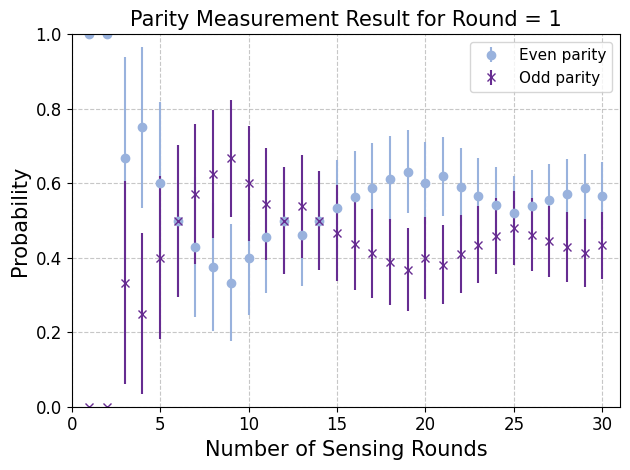

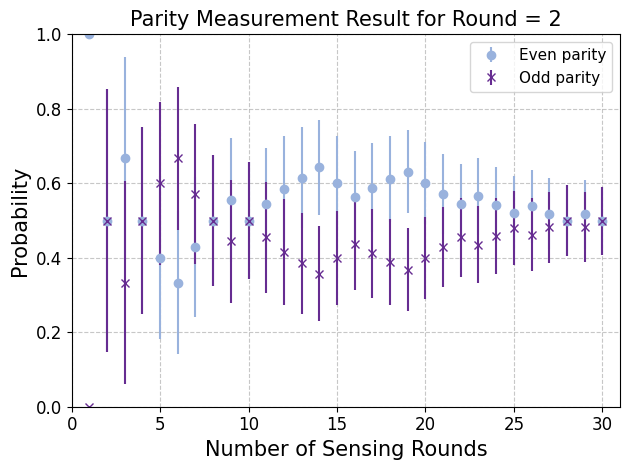

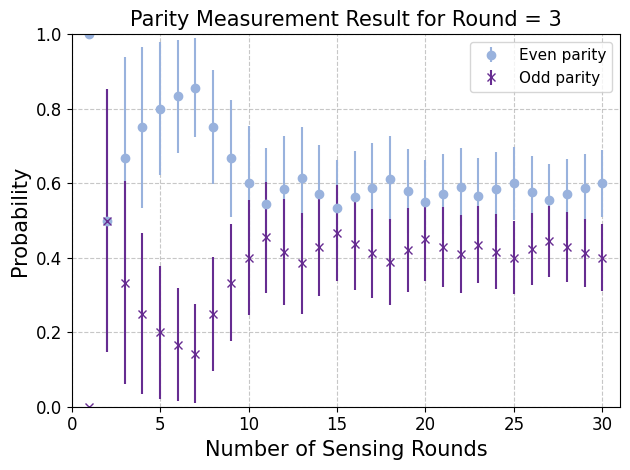

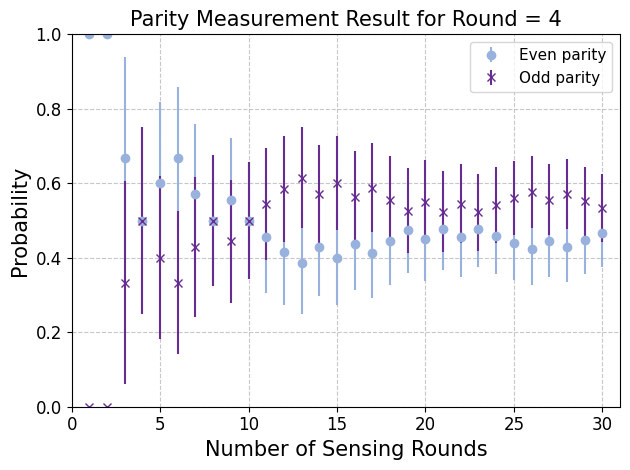

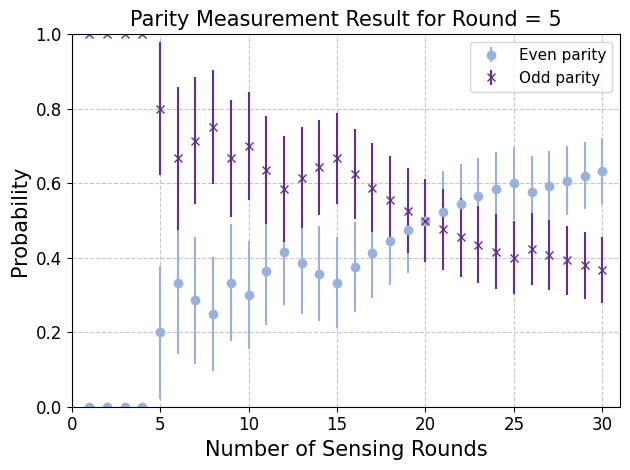

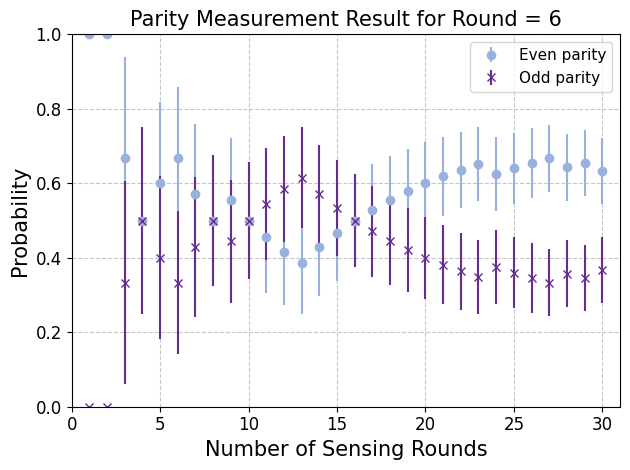

In [14]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames):
    plt.errorbar(samples_evolution, p_pass[index], p_pass_error[index], color=colors[0], fmt='o', label = "Even parity")
    plt.errorbar(samples_evolution, p_fail[index], p_fail_error[index], color=colors[1], fmt='x', label = "Odd parity")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.ylim(0,1)
    plt.xlim(0,31)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Parity_Measurement_Graph\short_sensing_p_evol_r={index+1}")
    plt.show()

In [19]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {"v": {"sum": {"values": np.zeros(6), "variance": np.zeros(6), "fisher_info": np.zeros(6)},
                    "indiv": {"values": np.zeros((4,6)), "variance": np.zeros((4,6)), "fisher_info": np.zeros((4,6))}},
              "dm": {"sum": {"values": np.zeros(6), "variance": np.zeros(6), "fisher_info": np.zeros(6)},
                    "indiv": {"values": np.zeros((4,6)), "variance": np.zeros((4,6)), "fisher_info": np.zeros((4,6))}}}

#### Function to write params in the dictionary
def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    lim = None
    estimation_results = mle.get_theta(get_cov = True,set_lim=lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1, 1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)
    for i in range(4):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/n_rounds)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]

dm_files = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\with_Certification\Run*")]
density_matrix = {}
QST_file = []

def generate_angles_in_radians(n):

    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        """
        Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
        et dont la somme est exactement égale à π/2.
        """
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 3))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = angles[1] - angles[0]
        a3 = angles[2] - angles[1]
        a4 = target_sum - angles[2]  # Assurer que la somme soit bien égale à π/2
        x.append([a1, a2, a3, a4])
        return x
final_p_fail_mean = [0.0173, 0.0201, 0.0152, 0.0144, 0.0152, 0.0142]
# Exemple d'exécution
fisher_info_matrix_GHZ = []
input_state = 'GHZ'
x0 = generate_angles_in_radians(20)
for index, file in enumerate(filenames):
    v = 1 - 2*final_p_fail_mean[index]
    qubit = 4
    
    os.chdir(dm_files[index])
    QST_file.append(glob.glob("QST_*")[0])
    os.chdir(f'{dm_files[index]}\\{QST_file[index]}')
    with open('density.npy','rb') as f:
        density_matrix[f'{QST_file[index]}'] = np.load(f)

    dm = density_matrix[QST_file[index]]
    meas_stats = stats_list[index]
    bnds = ((-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2))
    ##### Theta estimation and saving params in dictionary #####
    mle[file] = qpe.Estimator(input_state, qubit, meas_stats, x0,bnds, "visibility", (v))
    set_estimation_params(mle[file], thetas_mle["v"], index, a_vectors_list)
    mle[file].set_function_type("density_matrix", dm)
    set_estimation_params(mle[file], thetas_mle["dm"], index, a_vectors_list)
    fisher_info_matrix_GHZ.append(mle[file].get_cov_matrix())
# print(np.transpose(thetas_mle["v"]["sum"]["values"])*180/np.pi)
# print(np.transpose(thetas_mle["dm"]["sum"]["values"])*180/np.pi)

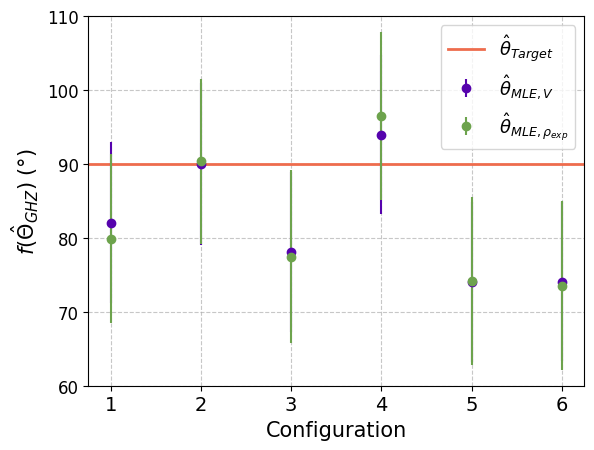

In [20]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(6.4, 4.8))
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
plt.errorbar(x_data, thetas_mle["v"]["sum"]["values"]*180/np.pi, thetas_mle["v"]["sum"]["variance"]*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{MLE, V}$", marker = 'o', linestyle = "")
plt.errorbar(x_data, thetas_mle["dm"]["sum"]["values"]*180/np.pi, thetas_mle["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{MLE, \rho_{exp}}$", marker = 'o', linestyle = "")

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{GHZ})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(60, 110)
plt.legend(fontsize=13, markerscale=1.)#, loc='upper left')#, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\\Private_QPE_paper\GHZ\GHZ_Short_sensing_MLEs.pdf")
plt.show()

In [21]:
thetas_mle["dm"]["indiv"]["values"]*180/np.pi

array([[-28.06791739, -27.72565762,  30.80838779,  90.        ,
          8.47411612, -90.        ],
       [ 90.        , -61.92795355, -42.36886683, -35.46240337,
         -3.79964908,  90.        ],
       [-72.03081115,  90.        ,  51.38671343,  90.        ,
         90.        , -16.46924914],
       [ 90.        ,  90.        ,  37.59646341, -48.08993985,
        -20.48137809,  90.        ]])

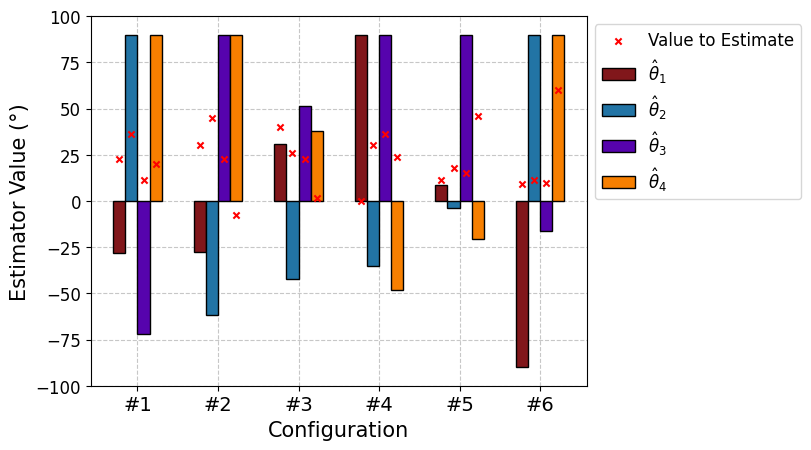

In [9]:
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\Long_QPE_no_Certification')
folder = [i for i in glob.glob(r"Run*")]

Angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
          'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.031166593785612928],'RUN_4' : [0,np.pi/6,np.pi/5,0.41887902047863923],
          'RUN_5' : [np.pi/16,np.pi/10,np.pi/12,0.7984881327874058],'RUN_6' : [np.pi/20,np.pi/16,np.pi/19,1.052020171498161]}

def plot_histogram(data, labels, colors, bar_width=0.15, ylim=None):
    num_groups = len(data[0])  # Assuming all datasets have the same number of x-axis groups
    num_datasets = len(data)
    x = np.arange(num_groups)  # X-axis positions for the first dataset
    
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    
    for i in range(num_datasets):
        ax.bar(x + i * bar_width, data[i], width=bar_width, label=labels[i], color=colors[i], edgecolor='black')

    
    legend_added = False  # Variable pour éviter de répéter la légende

    for i in range(num_groups):
            for w in range(num_datasets):
                x_point = x[i] + w * bar_width
                y_point = Angles[str(folder[i])][w] * 180 / np.pi

                if not legend_added:  # Ajouter la légende une seule fois
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x", label='Value to Estimate')
                    legend_added = True
                else:
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x")
            

    ax.set_xticks(x + (num_datasets - 1) * bar_width / 2)
    ax.set_xticklabels(['#1', '#2', '#3', '#4', '#5', '#6'], fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_xlabel("Configuration", fontsize = 15)
    ax.set_ylabel("Estimator Value (°)", fontsize = 15)

    # ax.set_title("Histogram with Multiple Data Sets")
    ax.legend(fontsize=12, bbox_to_anchor=(1, 1))

    
    if ylim:
        ax.set_ylim(-100, ylim)
        
    ax.set_axisbelow(True)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Estimator_Value_GHZ.pdf", bbox_inches='tight')
    plt.show()

# Example data for 6 datasets, each having values for 5 groups
data = [
    thetas_mle["dm"]["indiv"]["values"][0]*180/np.pi,
    thetas_mle["dm"]["indiv"]["values"][1]*180/np.pi,
    thetas_mle["dm"]["indiv"]["values"][2]*180/np.pi,
    thetas_mle["dm"]["indiv"]["values"][3]*180/np.pi
]

# data=np.transpose(data)
labels = [r"$\hat{\theta}_1$", r"$\hat{\theta}_2$", r"$\hat{\theta}_3$", r"$\hat{\theta}_4$"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F77F00", "#6DA34D"]

plot_histogram(data, labels, colors, ylim=100)

In [13]:
thetas_mle["dm"]["indiv"]["values"]*180/np.pi

array([[-28.0755617 , -27.7534767 ,  30.78794308,  90.        ,
          8.4134695 , -90.        ],
       [ 90.        , -61.90020243, -42.37439562, -35.45196766,
         -3.72250736,  90.        ],
       [-72.01881499,  90.        ,  51.43251009,  90.        ,
         90.        , -16.46859083],
       [ 90.        ,  90.        ,  37.57355351, -48.10239434,
        -20.49441023,  90.        ]])

In [11]:
####################### Relative Error #################

ratio_GHZ = []
for i in range(len(data[0])) : 
    for w in range(len(Angles[str(folder[i])])):
        ratio_GHZ.append(np.abs(Angles[str(folder[i])][w]*180/np.pi-thetas_mle["dm"]["indiv"]["values"][w][i]*180/np.pi)/180)

In [12]:
np.log10(100*np.array(ratio_GHZ))

array([1.44866821, 1.47712125, 1.66520988, 1.58827171, 1.50630563,
       1.77370602, 1.57403127, 1.73373211, 0.70908411, 1.57780242,
       1.20611361, 1.29846297, 1.69897   , 1.5606502 , 1.47712125,
       1.60267718, 0.19751495, 1.08163745, 1.61978876, 1.56587673,
       1.74036269, 1.64097806, 1.15873555, 1.21783013])

BELL

In [25]:
####################### VERIFICATION ANALYSIS #################

data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification"
#filenames = ["COMPLETE_QPE_FIRST_RUN", "COMPLETE_QPE_SECOND_RUN", "COMPLETE_QPE_THIRD_RUN", "COMPLETE_QPE_FOURTH_RUN", "COMPLETE_QPE_FIFTH_RUN", "COMPLETE_QPE_SIXTH_RUN"]
#filenames = ["COMPLETE_QPE_BELL_FIRST_RUN_20250129175719","COMPLETE_QPE_BELL_SECOND_RUN_20250129230913","COMPLETE_QPE_BELL_THIRD_RUN_20250203010747"]
filenames = [i for i in glob.glob("COMPLETE_*")]
os.chdir(data_dir)
n_qubits = 4
input_state = "Bell" #"Bell" or "GHZ" # This will specify in which folder we want to save the figures


In [26]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
stabilizers = ["xxxx"]
stab_sign = [1]

final_p_fail_mean_bottom = [0.0114, 0.0116, 0.0259]
final_p_fail_mean_top = [0.0074, 0.0079, 0.0173]

input_state = "Bell" # or GHZ # This will specify in which folder we want to save the figures
n_rounds = 30
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = {"file_1":{}, "file_2":{}, "file_3":{}}

p_pass = np.zeros((2, len(filenames), n_rounds))
p_pass_error = np.zeros((2, len(filenames), n_rounds))

for index, file in enumerate(filenames):    
    # pair = 0 refers to top pair and pair = 1 refers to bottom pair
    for pair in range(2):
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        file_dir = f"{data_dir}\{file}\counts"
        os.chdir(file_dir)

        files = [i for i in glob.glob("Phase*.txt")]
        ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
        files.sort(key = lambda x: int((x.split("_")[2]).split(".")[0]))

        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir, input_state, str(pair)) #Set_loops = 1?
        stats_list[f"file_{index+1}"][pair] = stats

        p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
        
        p_pass[pair][index] = np.array(p_pass_list, dtype = float)
        p_pass_error[pair][index] = np.array(stats.p_pass_error_list, dtype = float)
    
p_fail = 1 - p_pass
p_fail_error = p_pass_error

In [24]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames):
    plt.errorbar(samples_evolution, p_pass[0][index], p_pass_error[0][index], color=colors[0], fmt='o', label = "Even parity second pair")
    plt.errorbar(samples_evolution, p_pass[1][index], p_pass_error[1][index], color=colors[2], fmt='x', label = "Even parity first pair")
    plt.errorbar(samples_evolution, p_fail[0][index], p_fail_error[0][index], color=colors[1], fmt='o', label = "Odd parity second pair")
    plt.errorbar(samples_evolution, p_fail[1][index], p_fail_error[1][index], color=colors[3], fmt='x', label = "Odd parity first pair")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0,1)
    plt.xlim(0,30)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification\Parity_Measurement_Graph\Short_sensing_p_evol_r={index+1}")
    plt.show()

In [27]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle_bell = {0 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                            "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}},
                    "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                            "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}}},
            1 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                        "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}},
                "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                        "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}}}}

def generate_angles_in_radians(n):
    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 1))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = target_sum - angles[0]  # Assurer que la somme soit bien égale à π/2

        x.append([a1, a2])
    return x

def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    estimation_results = mle.get_theta(get_cov = True, set_lim = None).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance2(np.array([1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)
    for i in range(2):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance2(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/n_rounds)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0]), np.array([0, 1])]
bnds = ((-np.pi/2, np.pi/2), (-np.pi/2, np.pi/2))
x0 = generate_angles_in_radians(100)

### Loading the density matrices
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\QST\with_Certification\Run*")]
QST_file = []
for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file.append(glob.glob("QST_*")[0])

density_matrix = {k: {} for k in QST_file}
for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix[str(QST_file[index])][0] = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix[str(QST_file[index])][1] = np.load(g)

# density_matrix_list = []
# for index, file in enumerate(dm_folder):
#     density_matrix = []
#     os.chdir(f'{file}\\{QST_file[index]}')
#     with open('density_TOP.npy','rb') as f:
#         density_matrix.append(np.load(f))
#     with open('density_BOTTOM.npy','rb') as g:
#         density_matrix.append(np.load(g))

#     density_matrix_list.append(density_matrix)
    
bell = (np.array([1,0,0,0])+np.array([0,0,0,1]))/np.sqrt(2)
bellmatrix = np.array(np.outer(bell, np.conjugate(bell)))
fisher_info_matrix_bell = []
for index, file in enumerate(filenames):
    v = np.array([1 - 2*final_p_fail_mean_top[index], 1 - 2*final_p_fail_mean_bottom[index]])
    for i in range(2):
        dm = density_matrix[str(QST_file[index])][i]
        meas_stats = stats_list[f"file_{index+1}"][i]

        ##### Theta estimation and saving params in dictionary #####
        mle[file] = qpe.Estimator(input_state, i, meas_stats, x0, bnds, "visibility", v[i])
        set_estimation_params(mle[file], thetas_mle_bell[i]["v"], index, a_vectors_list)
        mle[file].set_function_type("density_matrix", dm)
        set_estimation_params(mle[file], thetas_mle_bell[i]["dm"], index, a_vectors_list)
        fisher_info_matrix_bell.append(mle[file].get_cov_matrix())

c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\p

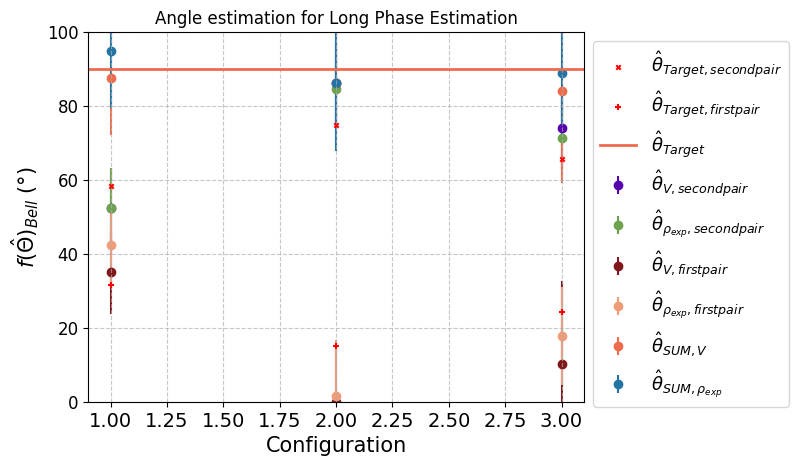

In [155]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"top": [sum(target_angles['RUN_1'][:2])*180/np.pi,
                        sum(target_angles['RUN_2'][:2])*180/np.pi,
                        sum(target_angles['RUN_3'][:2])*180/np.pi],
               "bottom": [sum(target_angles['RUN_1'][-2:])*180/np.pi,
                        sum(target_angles['RUN_2'][-2:])*180/np.pi,
                        sum(target_angles['RUN_3'][-2:])*180/np.pi], 
                "total" :[sum(target_angles['RUN_1'])*180/np.pi,
                        sum(target_angles['RUN_2'])*180/np.pi,
                        sum(target_angles['RUN_3'])*180/np.pi]}

plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle_bell[0]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_bell[0]["v"]["sum"]["variance"])*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_bell[0]["dm"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_bell[0]["dm"]["sum"]["variance"])*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.scatter(x_data, target_sums["top"], color='red', s=10, marker="x",label=r"$\hat{\theta}_{Target,second pair}$",zorder=2)

plt.errorbar(x_data, thetas_mle_bell[1]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_bell[1]["v"]["sum"]["variance"])*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_bell[1]["dm"]["sum"]["values"]*180/np.pi,np.sqrt((thetas_mle_bell[1]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.scatter(x_data, target_sums["bottom"], color='red', s=20, marker="+",label=r"$\hat{\theta}_{Target,first pair}$",zorder=2)

plt.errorbar(x_data, (thetas_mle_bell[1]["v"]["sum"]["values"]+thetas_mle_bell[0]["v"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_bell[1]["v"]["sum"]["variance"]+thetas_mle_bell[0]["v"]["sum"]["variance"]))*180/np.pi, color=colors[0], label = r"$\hat{\theta}_{SUM,V}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, (thetas_mle_bell[1]["dm"]["sum"]["values"]+thetas_mle_bell[0]["dm"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_bell[1]["dm"]["sum"]["variance"]+thetas_mle_bell[0]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(0,100)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification\Angle_Short_Phase_Estimation_Bell.pdf", bbox_inches='tight')
plt.show()

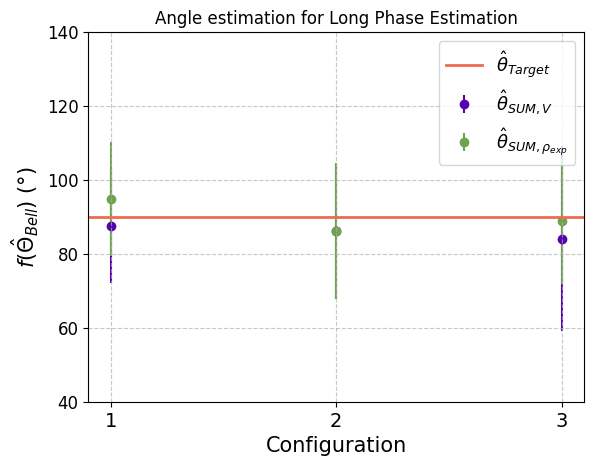

In [172]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

plt.errorbar(x_data, (thetas_mle_bell[1]["v"]["sum"]["values"]+thetas_mle_bell[0]["v"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_bell[1]["v"]["sum"]["variance"]+thetas_mle_bell[0]["v"]["sum"]["variance"]))*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{SUM,V}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, (thetas_mle_bell[1]["dm"]["sum"]["values"]+thetas_mle_bell[0]["dm"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_bell[1]["dm"]["sum"]["variance"]+thetas_mle_bell[0]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{Bell})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(x_data,fontsize=14)
plt.ylim(40,140)
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification\Angle_Short_Phase_Estimation_Bell_sum.pdf")
plt.show()

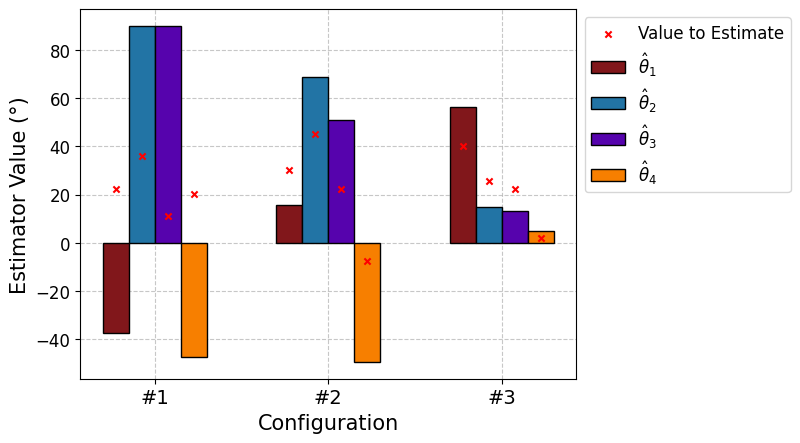

In [28]:
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\Long_QPE_no_Certification')
folder = [i for i in glob.glob(r"Run*")]

Angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
          'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.031166593785612928],'RUN_4' : [0,np.pi/6,np.pi/5,0.41887902047863923],
          'RUN_5' : [np.pi/16,np.pi/10,np.pi/12,0.7984881327874058],'RUN_6' : [np.pi/20,np.pi/16,np.pi/19,1.052020171498161]}

def plot_histogram(data, labels, colors, bar_width=0.15, ylim=None):
    num_groups = len(data[0])  # Assuming all datasets have the same number of x-axis groups
    num_datasets = len(data)
    x = np.arange(num_groups)  # X-axis positions for the first dataset
    
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    
    for i in range(num_datasets):
        ax.bar(x + i * bar_width, data[i], width=bar_width, label=labels[i], color=colors[i], edgecolor='black')

    
    legend_added = False  # Variable pour éviter de répéter la légende

    for i in range(num_groups):
            for w in range(num_datasets):
                x_point = x[i] + w * bar_width
                y_point = Angles[str(folder[i])][w] * 180 / np.pi

                if not legend_added:  # Ajouter la légende une seule fois
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x", label='Value to Estimate')
                    legend_added = True
                else:
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x")
            

    ax.set_xticks(x + (num_datasets - 1) * bar_width / 2)
    ax.set_xticklabels(['#1', '#2', '#3'], fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_xlabel("Configuration", fontsize = 15)
    ax.set_ylabel("Estimator Value (°)", fontsize = 15)

    # ax.set_title("Histogram with Multiple Data Sets")
    ax.legend(fontsize=12, bbox_to_anchor=(1, 1))


    ax.set_axisbelow(True)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Estimator_Value_Bell.pdf", bbox_inches='tight')
    plt.show()

# Example data for 6 datasets, each having values for 5 groups
data = [
    (thetas_mle_bell[0]["dm"]["indiv"]["values"][0])*180/np.pi,
    (thetas_mle_bell[0]["dm"]["indiv"]["values"][1])*180/np.pi,
    (thetas_mle_bell[1]["dm"]["indiv"]["values"][0])*180/np.pi,
    (thetas_mle_bell[1]["dm"]["indiv"]["values"][1])*180/np.pi,
]

# data=np.transpose(data)
labels = [r"$\hat{\theta}_1$", r"$\hat{\theta}_2$", r"$\hat{\theta}_3$", r"$\hat{\theta}_4$"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F77F00", "#6DA34D"]

plot_histogram(data, labels, colors, ylim=150)

In [29]:
ratio_Bell = []
for i in range(len(data[0])) : 
      for w in range(len(Angles[str(folder[i])])):
            ratio_Bell.append(np.abs(Angles[str(folder[i])][w]*180/np.pi-thetas_mle_bell[np.round((w+1)/4)]["dm"]["indiv"]["values"][(w)%2][i]*180/np.pi)/180)

In [31]:
np.log10(np.array(ratio_Bell)*100)

array([1.52283394, 1.47712125, 1.64097806, 1.57634833, 0.90220893,
       1.12493965, 1.20093698, 1.36749072, 0.96021117, 0.77926758,
       0.72186329, 0.20765421])

In [36]:
thetas_mle_bell[1]["dm"]["indiv"]["values"]*180/np.pi

array([[ 90.        ,  51.08969268,  13.01284941],
       [-47.6110907 , -49.45302   ,   4.68924692]])

PLUS

In [40]:
####################### VERIFICATION ANALYSIS #################
data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification"
#filenames = ["COMPLETE_QPE_FIRST_RUN", "COMPLETE_QPE_SECOND_RUN", "COMPLETE_QPE_THIRD_RUN", "COMPLETE_QPE_FOURTH_RUN", "COMPLETE_QPE_FIFTH_RUN", "COMPLETE_QPE_SIXTH_RUN"]
#filenames = ["COMPLETE_QPE_BELL_FIRST_RUN_20250129175719","COMPLETE_QPE_BELL_SECOND_RUN_20250129230913","COMPLETE_QPE_BELL_THIRD_RUN_20250203010747"]
filenames = [i for i in glob.glob("QPE*")]
os.chdir(data_dir)
n_qubits = 4
input_state = "Plus" #"Bell" or "GHZ" # This will specify in which folder we want to save the figures
fail_mean = [[0.0019, 0.0176, 0.031],[0.0016, 0.0039, 0.0019],[0.0005, 0.0008, 0.0012],[0.0066, 0.0228, 0.0191]]

In [41]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
stabilizers = ["xxxx"]
stab_sign = [-1]

input_state = "Plus" # or GHZ # This will specify in which folder we want to save the figures
n_rounds = 30
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = {"file_1":{}, "file_2":{}, "file_3":{}}

p_pass = np.zeros((4, len(filenames), n_rounds))
p_pass_error = np.zeros((4, len(filenames), n_rounds))

for index, file in enumerate(filenames):    
    # pair = 0 refers to top pair and pair = 1 refers to bottom pair
    for pair in range(4):
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        file_dir = f"{data_dir}\{file}\counts"
        os.chdir(file_dir)

        files = [i for i in glob.glob("Phase*.txt")]
        ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
        files.sort(key = lambda x: int((x.split("_")[2]).split(".")[0]))

        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir, input_state, str(pair)) #Set_loops = 1?
        stats_list[f"file_{index+1}"][pair] = stats

        p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
        
        p_pass[pair][index] = np.array(p_pass_list, dtype = float)
        p_pass_error[pair][index] = np.array(stats.p_pass_error_list, dtype = float)
    
p_fail = 1 - p_pass
p_fail_error = p_pass_error

In [39]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames):
    plt.errorbar(samples_evolution, p_pass[0][index], p_pass_error[0][index], color=colors[0], fmt='o', label = "Even parity first qubit")
    plt.errorbar(samples_evolution, p_pass[1][index], p_pass_error[1][index], color=colors[2], fmt='x', label = "Even parity second qubit")
    plt.errorbar(samples_evolution, p_fail[0][index], p_fail_error[0][index], color=colors[1], fmt='o', label = "Odd parity first qubit")
    plt.errorbar(samples_evolution, p_fail[1][index], p_fail_error[1][index], color=colors[3], fmt='x', label = "Odd parity second qubit")
    plt.errorbar(samples_evolution, p_pass[2][index], p_pass_error[2][index], color=colors[0], fmt='p', label = "Even parity third qubit")
    plt.errorbar(samples_evolution, p_pass[3][index], p_pass_error[3][index], color=colors[2], fmt='s', label = "Even parity fourth qubit")
    plt.errorbar(samples_evolution, p_fail[2][index], p_fail_error[2][index], color=colors[1], fmt='p', label = "Odd parity third qubit")
    plt.errorbar(samples_evolution, p_fail[3][index], p_fail_error[3][index], color=colors[3], fmt='s', label = "Odd parity fourth qubit")

    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0,1)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Parity_Measurement_Graph\Short_sensing_p_evol_r={index+1}")
    plt.show()

In [42]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle_plus = {0 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            1 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            2 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            3 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}}}

def generate_angles_in_radians(n):
    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 1))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a4 = target_sum - angles[0]  # Assurer que la somme soit bien égale à π/2

        x.append(a1)

    return x

def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    estimation_results = mle.get_theta(get_cov = True, set_lim = None).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance2(np.array([1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)

### Vector list to extract the estimation of the indifivual params
a_vectors_list = np.array([1])

x0 = generate_angles_in_radians(20)

plus = (np.array([1,0])+np.array([0,1]))/np.sqrt(2)
plusmatrix = np.array(np.outer(plus, np.conjugate(plus)))

dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\QST\SHORT\Run*")]
QST_file = []
for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file.append(glob.glob("QST_*")[0])
density_matrix = {k:{} for k in QST_file}
for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file[index]}')
    with open('density_TOP.npy','rb') as f:
        density_top = np.load(f)
        density_matrix[f'{QST_file[index]}'][0] = qpe.partial_trace(density_top,A=True,B=False)
        density_matrix[f'{QST_file[index]}'][1] = qpe.partial_trace(density_top,A=False,B=True)
    with open('density_BOTTOM.npy','rb') as g:
        density_bottom = np.load(g)
        density_matrix[f'{QST_file[index]}'][2] = qpe.partial_trace(density_bottom,A=True,B=False)
        density_matrix[f'{QST_file[index]}'][3] = qpe.partial_trace(density_bottom,A=False,B=True)
fisher_info_matrix_plus = []

input_state = 'Plus'
for index, file in enumerate(filenames):
    v = [1 - fail_mean[0][index],1 - fail_mean[1][index],1 - fail_mean[2][index],1 - fail_mean[3][index]]
    bnds = ((-np.pi,np.pi),)
    for i in range(4):
        dm = plusmatrix
        meas_stats = stats_list[f"file_{index+1}"][i]
        ##### Theta estimation and saving params in dictionary #####
        mle[file] = qpe.Estimator(input_state, i, meas_stats, x0, bnds, "visibility", v[i])
        set_estimation_params(mle[file], thetas_mle_plus[i]["v"], index, a_vectors_list)
        mle[file].set_function_type("density_matrix", dm)
        set_estimation_params(mle[file], thetas_mle_plus[i]["dm"], index, a_vectors_list)
        fisher_info_matrix_plus.append(mle[file].get_cov_matrix())

c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[0][0] = matrixA_B[0][0] + matrixA_B[1][1]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[0][1] = matrixA_B[0][2] + matrixA_B[1][3]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[1][0] = matrixA_B[2][0] + matrixA_B[3][1]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:33: ComplexWarning: Casting complex values to real discards the

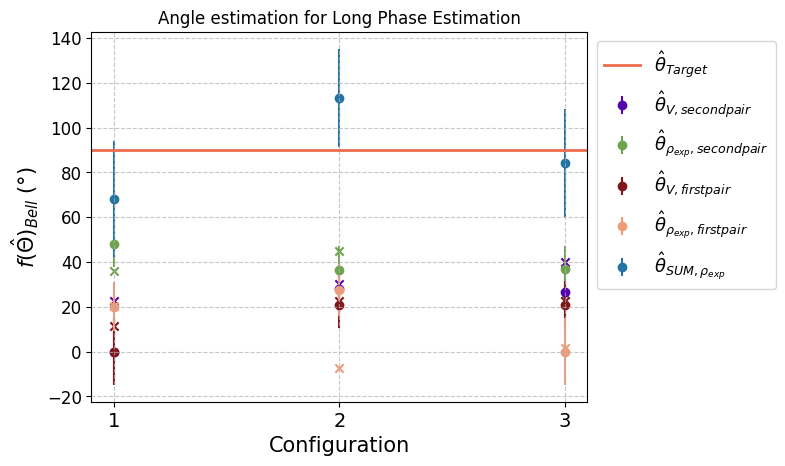

In [170]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"0": [(target_angles['RUN_1'][0])*180/np.pi,
                        (target_angles['RUN_2'][0])*180/np.pi,
                        (target_angles['RUN_3'][0])*180/np.pi],
                "1": [(target_angles['RUN_1'][1])*180/np.pi,
                        (target_angles['RUN_2'][1])*180/np.pi,
                        (target_angles['RUN_3'][1])*180/np.pi],
                "2": [(target_angles['RUN_1'][2])*180/np.pi,
                        (target_angles['RUN_2'][2])*180/np.pi,
                        (target_angles['RUN_3'][2])*180/np.pi],
                "3": [(target_angles['RUN_1'][3])*180/np.pi,
                        (target_angles['RUN_2'][3])*180/np.pi,
                        (target_angles['RUN_3'][3])*180/np.pi]}

plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle_plus[0]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[0]["v"]["sum"]["variance"])*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[1]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[1]["v"]["sum"]["variance"])*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[2]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[2]["v"]["sum"]["variance"])*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[3]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[3]["v"]["sum"]["variance"])*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)

plt.errorbar(x_data, (thetas_mle_plus[0]["v"]["sum"]["values"]+thetas_mle_plus[1]["v"]["sum"]["values"]+thetas_mle_plus[2]["v"]["sum"]["values"]+thetas_mle_plus[3]["v"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_plus[1]["v"]["sum"]["variance"]+thetas_mle_plus[0]["v"]["sum"]["variance"]+thetas_mle_plus[2]["v"]["sum"]["variance"]+thetas_mle_plus[3]["v"]["sum"]["variance"]))*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)

plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
for i in range((len(target_sums))):
    plt.scatter(x_data,target_sums[str(i)],marker='x',color = colors[i+1],zorder=0)



plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(x_data,fontsize=14)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Angle_Short_Phase_Estimation_visibility", bbox_inches='tight')
plt.show()

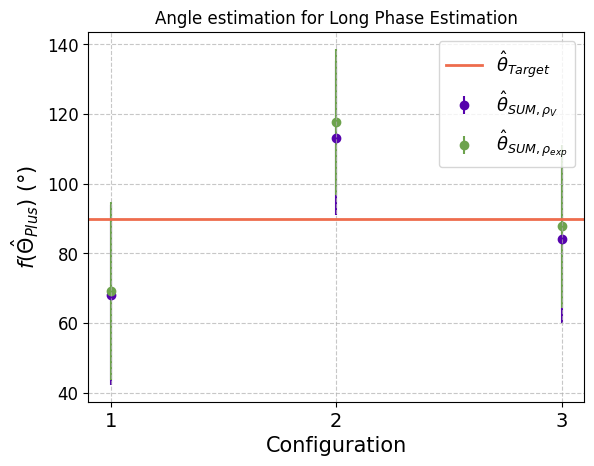

In [43]:
x_data = [1, 2, 3]
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]

plt.errorbar(x_data, (thetas_mle_plus[0]["v"]["sum"]["values"]+thetas_mle_plus[1]["v"]["sum"]["values"]+thetas_mle_plus[2]["v"]["sum"]["values"]+thetas_mle_plus[3]["v"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_plus[1]["v"]["sum"]["variance"]+thetas_mle_plus[0]["v"]["sum"]["variance"]+thetas_mle_plus[2]["v"]["sum"]["variance"]+thetas_mle_plus[3]["v"]["sum"]["variance"]))*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{SUM,\rho_{V}}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, (thetas_mle_plus[0]["dm"]["sum"]["values"]+thetas_mle_plus[1]["dm"]["sum"]["values"]+thetas_mle_plus[2]["dm"]["sum"]["values"]+thetas_mle_plus[3]["dm"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_plus[1]["dm"]["sum"]["variance"]+thetas_mle_plus[0]["dm"]["sum"]["variance"]+thetas_mle_plus[2]["dm"]["sum"]["variance"]+thetas_mle_plus[3]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{Plus})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(x_data,fontsize=14)
plt.legend(fontsize=13, markerscale=1.)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Angle_Short_Phase_Estimation_visibility_sum.pdf")
plt.show()

NameError: name 'target_sums' is not defined

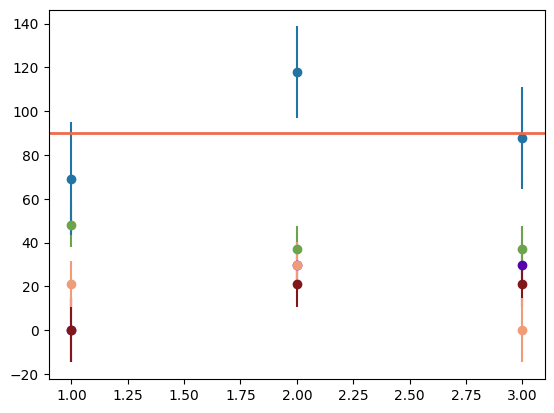

In [44]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]



plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle_plus[0]["dm"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[0]["dm"]["sum"]["variance"])*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[1]["dm"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[1]["dm"]["sum"]["variance"])*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[2]["dm"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[2]["dm"]["sum"]["variance"])*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[3]["dm"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[3]["dm"]["sum"]["variance"])*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)

plt.errorbar(x_data, (thetas_mle_plus[0]["dm"]["sum"]["values"]+thetas_mle_plus[1]["dm"]["sum"]["values"]+thetas_mle_plus[2]["dm"]["sum"]["values"]+thetas_mle_plus[3]["dm"]["sum"]["values"])*180/np.pi,np.sqrt((thetas_mle_plus[1]["dm"]["sum"]["variance"]+thetas_mle_plus[0]["dm"]["sum"]["variance"]+thetas_mle_plus[2]["dm"]["sum"]["variance"]+thetas_mle_plus[3]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
for i in range((len(target_sums))):
    plt.scatter(x_data,target_sums[str(i)],marker='x',color = colors[i+1],zorder=0)



plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Angle_Short_Phase_Estimation_dm", bbox_inches='tight')
plt.show()

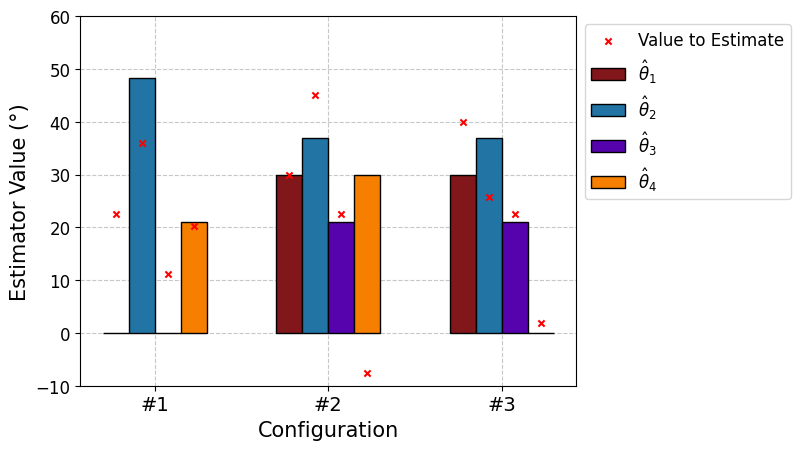

In [45]:
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\Long_QPE_no_Certification')
folder = [i for i in glob.glob(r"Run*")]



Angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}


def plot_histogram(data, labels, colors, bar_width=0.15, ylim=None):
    num_groups = len(data[0])  # Assuming all datasets have the same number of x-axis groups
    num_datasets = len(data)
    x = np.arange(num_groups)  # X-axis positions for the first dataset
    
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    
    for i in range(num_datasets):
        ax.bar(x + i * bar_width, data[i], width=bar_width, label=labels[i], color=colors[i], edgecolor='black')

    
    legend_added = False  # Variable pour éviter de répéter la légende

    for i in range(num_groups):
            for w in range(num_datasets):
                x_point = x[i] + w * bar_width
                y_point = Angles[str(folder[i])][w] * 180 / np.pi

                if not legend_added:  # Ajouter la légende une seule fois
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x", label='Value to Estimate')
                    legend_added = True
                else:
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x")
            

    ax.set_xticks(x + (num_datasets - 1) * bar_width / 2)
    ax.set_xticklabels(['#1', '#2', '#3'], fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_xlabel("Configuration", fontsize = 15)
    ax.set_ylabel("Estimator Value (°)", fontsize = 15)

    # ax.set_title("Histogram with Multiple Data Sets")
    ax.legend(fontsize=12, bbox_to_anchor=(1, 1))

    
    if ylim:
        ax.set_ylim(-10, ylim)

    ax.set_axisbelow(True)
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\Long_QPE_no_Certification\Estimator_Value_Plus.pdf")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Example data for 6 datasets, each having values for 5 groups
data = [
    thetas_mle_plus[0]["dm"]["sum"]["values"]*180/np.pi,
    thetas_mle_plus[1]["dm"]["sum"]["values"]*180/np.pi,
    thetas_mle_plus[2]["dm"]["sum"]["values"]*180/np.pi,
    thetas_mle_plus[3]["dm"]["sum"]["values"]*180/np.pi
]

# data=np.transpose(data)
labels = [r"$\hat{\theta}_1$", r"$\hat{\theta}_2$", r"$\hat{\theta}_3$", r"$\hat{\theta}_4$"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F77F00", "#6DA34D"]

plot_histogram(data, labels, colors, ylim=60)

In [52]:
thetas_mle_plus[3]["dm"]["sum"]["values"]*180/np.pi

array([2.10396103e+01, 2.99263808e+01, 1.48849959e-12])

In [46]:
ratio_Plus

NameError: name 'ratio_Plus' is not defined

In [47]:
ratio_Plus = []
for i in range(len(data[0])) : 
      for w in range(len(Angles[str(folder[i])])):
            ratio_Plus.append(np.abs(Angles[str(folder[i])][w]*180/np.pi-thetas_mle_plus[w]["dm"]["sum"]["values"][i]*180/np.pi)/180)
            
np.log10(100*np.array(ratio_Plus))

array([ 1.09691001,  0.83071843,  0.79588002, -0.3578597 , -1.38827805,
        0.65482018, -0.09080375,  1.31790533,  0.74791307,  0.7922232 ,
       -0.09069092, -0.00346053])

FISHER INFO AND PRIVACY

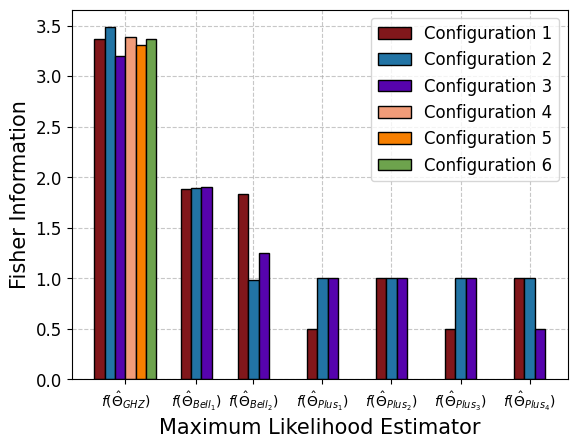

In [215]:
"""
PLOTTING THE FISHER INFORMATION FOR THE EACH OF THE a_vectors DEFINED ABOVE
"""

bar_width=0.15
data = [
    thetas_mle["dm"]["sum"]["fisher_info"],
    thetas_mle_bell[0]["dm"]["sum"]["fisher_info"],
    thetas_mle_bell[1]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[0]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[1]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[2]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[3]["dm"]["sum"]["fisher_info"]
    ]

labels = ["Configuration 1", "Configuration 2", "Configuration 3", "Configuration 4", "Configuration 5", "Configuration 6"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F19C79", "#F77F00", "#6DA34D"]
fig, ax = plt.subplots(figsize=(6.4, 4.8))

      # Assuming all datasets have the same number of x-axis groups
num_groups = len(data)
x = np.arange(num_groups)
for i in range(num_groups):
    data_sets = len(data[i])
    # X-axis positions for the first dataset
    if i == 0 :
        for z in range(data_sets):
            ax.bar(x[i] + z * bar_width, data[i][z], width=bar_width, label=labels[z], color=colors[z], edgecolor='black')
            
    if i == 1 :
        for z in range(data_sets):
            ax.bar(x[i]+0.25 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

    if i == 2 :
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')
    if i >2:
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

ax.set_xticks(np.array([0.375, 1.4, 2.23,3.23,4.23,5.23,6.23]))
ax.set_xlabel("Maximum Likelihood Estimator", fontsize = 15)
ax.set_ylabel("Fisher Information", fontsize = 15)
# ax.set_title("Histogram with Multiple Data Sets")
ax.legend(fontsize=12)
ax.set_xticklabels([r'$f(\hat{\Theta}_{GHZ})$',r'$f(\hat{\Theta}_{Bell_1})$',r'$f(\hat{\Theta}_{Bell_2})$',r'$f(\hat{\Theta}_{Plus_1})$',r'$f(\hat{\Theta}_{Plus_2})$',r'$f(\hat{\Theta}_{Plus_3})$',r'$f(\hat{\Theta}_{Plus_4})$'], fontsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.set_axisbelow(True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\with_Certification\Fisher_Information.pdf", bbox_inches='tight')
plt.show()

# Example data for 6 datasets, each having values for 5 groups




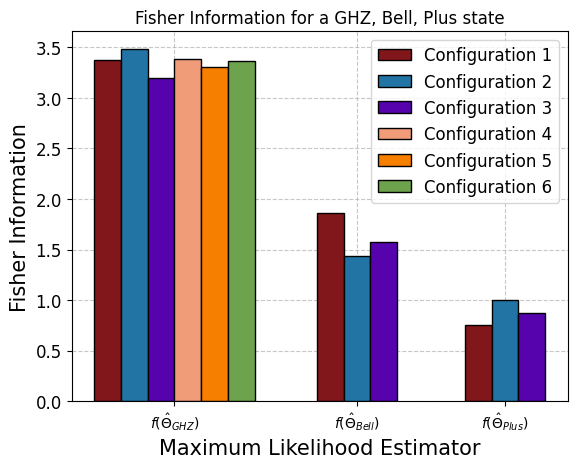

In [222]:
"""
PLOTTING THE FISHER INFORMATION FOR THE EACH OF THE a_vectors DEFINED ABOVE
"""

bar_width=0.15
data = [
    thetas_mle["dm"]["sum"]["fisher_info"],
    (thetas_mle_bell[0]["dm"]["sum"]["fisher_info"] + thetas_mle_bell[1]["dm"]["sum"]["fisher_info"])/2,
    (thetas_mle_plus[0]["dm"]["sum"]["fisher_info"] +thetas_mle_plus[1]["dm"]["sum"]["fisher_info"]+thetas_mle_plus[2]["dm"]["sum"]["fisher_info"]+thetas_mle_plus[3]["dm"]["sum"]["fisher_info"])/4]

labels = ["Configuration 1", "Configuration 2", "Configuration 3", "Configuration 4", "Configuration 5", "Configuration 6"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F19C79", "#F77F00", "#6DA34D"]
fig, ax = plt.subplots(figsize=(6.4, 4.8))

      # Assuming all datasets have the same number of x-axis groups
num_groups = len(data)
x = np.arange(num_groups)
for i in range(num_groups):
    data_sets = len(data[i])
    # X-axis positions for the first dataset
    if i == 0 :
        for z in range(data_sets):
            ax.bar(x[i] + z * bar_width, data[i][z], width=bar_width, label=labels[z], color=colors[z], edgecolor='black')
            
    if i == 1 :
        for z in range(data_sets):
            ax.bar(x[i]+0.25 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

    if i == 2 :
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')
    if i >2:
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

ax.set_xticks(np.array([0.375, 1.4, 2.23]))
ax.set_xlabel("Maximum Likelihood Estimator", fontsize = 15)
ax.set_ylabel("Fisher Information", fontsize = 15)
# ax.set_title("Histogram with Multiple Data Sets")
ax.legend(fontsize=12)
ax.set_xticklabels([r'$f(\hat{\Theta}_{GHZ})$',r'$f(\hat{\Theta}_{Bell})$',r'$f(\hat{\Theta}_{Plus})$'], fontsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.set_axisbelow(True)
plt.title('Fisher Information for a GHZ, Bell, Plus state')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\with_Certification\Fisher_Information.pdf", bbox_inches='tight')
plt.show()

# Example data for 6 datasets, each having values for 5 groups




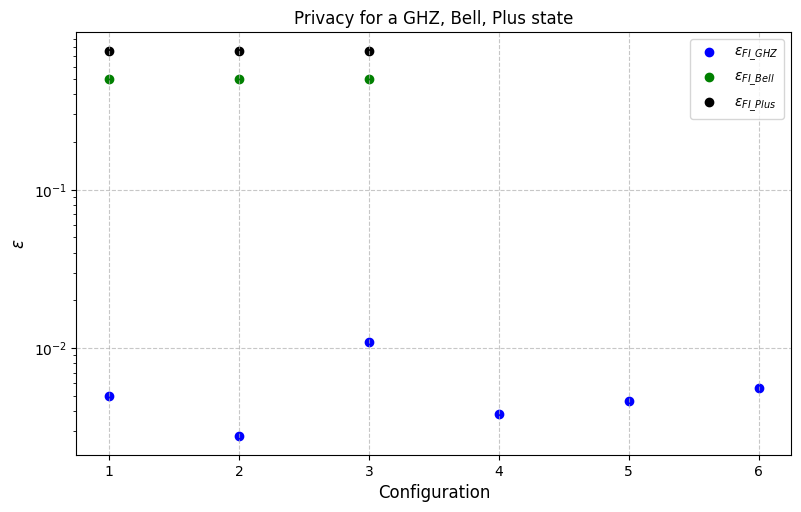

In [225]:
'''PRIVACY PLOT '''
import csv


def privacy(state,a_vector,fisher_info_matrix,fisher_info_matrix2=None,fisher_info_matrix3=None,fisher_info_matrix4=None):
    if state =='GHZ':
        return np.trace((np.identity(4)-((np.transpose(a_vector)*a_vector)/(np.linalg.norm(a_vector))**2))@fisher_info_matrix)/np.trace(fisher_info_matrix)

    if state == 'Bell':
        fisher_info_matrix_combine = np.block([[fisher_info_matrix,np.zeros((2, 2))],[np.zeros((2, 2)),fisher_info_matrix2]])
        return np.trace((np.identity(4)-((np.transpose(a_vector)*a_vector)/(np.linalg.norm(a_vector))**2))@fisher_info_matrix_combine)/(np.trace(fisher_info_matrix_combine))
    
    if state == 'Plus':
        fisher_info_matrix_combine = np.block([[fisher_info_matrix,np.zeros((1,1)),np.zeros((1, 1)),np.zeros((1,1))],
                                            [np.zeros((1,1)),fisher_info_matrix2,np.zeros((1, 1)),np.zeros((1,1))],
                                            [np.zeros((1,1)),np.zeros((1,1)),fisher_info_matrix3,np.zeros((1,1))],
                                            [np.zeros((1,1)),np.zeros((1,1)),np.zeros((1, 1)),fisher_info_matrix4]])
        return np.trace((np.identity(4)-((np.transpose(a_vector)*a_vector)/(np.linalg.norm(a_vector))**2))@fisher_info_matrix_combine)/(np.trace(fisher_info_matrix_combine))

def fisher_matrix(state,fisher_info_matrix,fisher_info_matrix2,fisher_info_matrix3 = None,fisher_info_matrix4 = None):

    if state == 'Plus':

        fisher_info_matrix_combine = np.block([[fisher_info_matrix,np.zeros((1,1)),np.zeros((1, 1)),np.zeros((1,1))],
                                            [np.zeros((1,1)),fisher_info_matrix2,np.zeros((1, 1)),np.zeros((1,1))],
                                            [np.zeros((1,1)),np.zeros((1,1)),fisher_info_matrix3,np.zeros((1,1))],
                                            [np.zeros((1,1)),np.zeros((1,1)),np.zeros((1, 1)),fisher_info_matrix4]])
        
        return fisher_info_matrix_combine
    
    if state == 'Bell':

        fisher_info_matrix_combine = np.block([[fisher_info_matrix,np.zeros((2, 2))],[np.zeros((2, 2)),fisher_info_matrix2]])
        
        return fisher_info_matrix_combine

    
    
epsilon_GHZ = []
epsilon_Bell = []
Fidelity_privacy_GHZ = []
Fidelity_privacy_Bell = []
epsilon_Plus = []

Fidelity_GHZ = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Verif\GHZ*")]
Fidelity_Bell = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Verif\Bell*")]

for files in Fidelity_GHZ:
    with open(files, 'r') as output:
        Fidelity_privacy_GHZ.append(1-sum(np.loadtxt(output, comments="#", delimiter=",", unpack=False))/30)

for files in Fidelity_Bell:
    with open(files, 'r') as output:
        Fidelity_privacy_Bell.append(1-(sum(np.loadtxt(output, comments="#", delimiter=",", unpack=False))/30))

for i in range(len(fisher_info_matrix_GHZ)):
    state = 'GHZ'
    a_vector = np.matrix([1, 1, 1, 1])
    epsilon_GHZ.append(privacy(state,a_vector,fisher_info_matrix_GHZ[i]))

for i in range((3)):
    state = 'Plus'
    a_vector = np.matrix([1, 1, 1, 1])
    epsilon_Plus.append(privacy(state,a_vector,fisher_info_matrix_plus[3*i],fisher_info_matrix_plus[3*i+1],fisher_info_matrix_plus[3*i+2],fisher_info_matrix_plus[3*i+3]))

for i in range((3)):
    state = 'Bell'
    a_vector = np.matrix([1, 1, 1, 1])
    epsilon_Bell.append(privacy(state,a_vector,fisher_info_matrix_bell[i*2],fisher_info_matrix_bell[(i*2)+1]))

x_vals = [1, 2, 3, 4, 5, 6]
x_vals2 = [1, 2, 3]
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, epsilon_GHZ, marker='o', linestyle='-', color='blue',label = r"$\epsilon_{FI\_GHZ}$")
# plt.scatter(x_vals,Fidelity_privacy_GHZ, marker='o', linestyle='-', color='red',label = r'$\epsilon_{Fidelity\_GHZ}$')
plt.scatter(x_vals2, epsilon_Bell, marker='o', linestyle='-', color='green',label=r'$\epsilon_{FI\_Bell}$')
plt.scatter(x_vals2, epsilon_Plus, marker='o', linestyle='-', color='black',label=r'$\epsilon_{FI\_Plus}$')
plt.xlabel('Configuration', fontsize=12)
plt.ylabel(r'$\epsilon$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(x_vals)
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.title('Privacy for a GHZ, Bell, Plus state')
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\with_Certification\Privacy_GHZ.pdf", bbox_inches='tight')
plt.show()

In [179]:
fisher = []
for i in range((3)):
    state = 'Bell'
    a_vector = np.matrix([1, 1, 1, 1])
    fisher.append(fisher_matrix(state,fisher_info_matrix_bell[i*2],fisher_info_matrix_bell[(i*2)+1]))